In [52]:
import numpy as np 
import matplotlib.pyplot as plt 

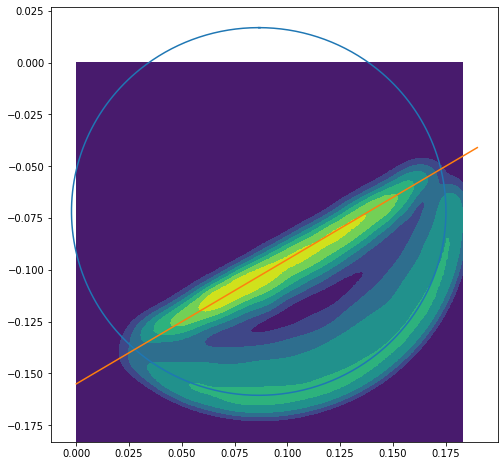

In [53]:
#importing flow data:

data = np.loadtxt('RIMS_data_vector.dat')
#data = np.loadtxt('cavityNonNewtonian_n2_k0_01_0.csv',delimiter = ',')
plt.figure(figsize=(8,8))
u_data = data[:,2] 
v_data = data[:,3]
Xu = data[:,0]
Zu = data[:,1]
plt.tricontourf(Xu,-Zu,np.sqrt(u_data**2 + v_data**2))
dt = 0.01
pixel2real = 0.0001848337
xc = 467.5*pixel2real
zc = 388.6*pixel2real
#r = 524.8*pixel2real #true radius
r = 480*pixel2real
theta = np.arange(0,2*3.14159+dt,dt)
xcircle = xc + r*np.sin(theta)
zcircle = -zc + r*np.cos(theta)
plt.plot(xcircle,zcircle)
xline = np.arange(0,0.2,0.01)
m = 0.6
c = -0.155
yline = xline*m + c
plt.plot()
plt.plot(xline,yline)


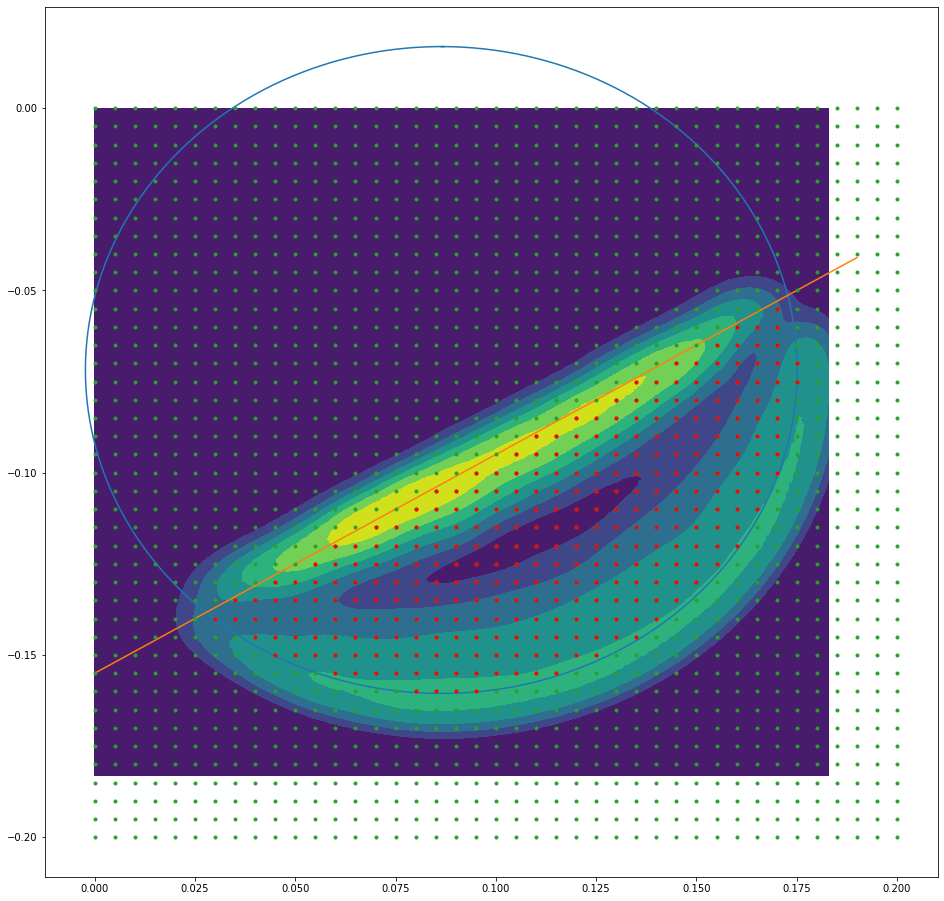

In [58]:
dx = 0.005
xx,zz = np.meshgrid(np.arange(0,0.2+dx,dx),np.arange(-0.2,dx,dx))
Xtotal = np.stack((xx.flatten(),zz.flatten()),axis=1)


plt.figure(figsize=(16,16))
plt.tricontourf(Xu,-Zu,np.sqrt(u_data**2 + v_data**2))
plt.plot(xcircle,zcircle)
plt.plot(xline,yline)
plt.plot(xx.flatten(),zz.flatten(),'.')

#removing points outside of circle:

X_interior = Xtotal[Xtotal[:,1]-m*Xtotal[:,0]-c<=0,:]
X_interior = X_interior[(X_interior[:,0]-xc)**2 + (X_interior[:,1]+zc)**2 - r**2 <= 0,:]
plt.plot(X_interior[:,0],X_interior[:,1],'.',color = 'r')


#define semicircle:

m=0
c = -0.2

plt.figure(figsize=(16,16))
dx = 0.025
xx,zz = np.meshgrid(np.arange(-1.0,1.0+dx,dx),np.arange(-1,dx+c,dx))

#define semicircle:

m=0
c = -0.2

plt.figure(figsize=(16,16))
dx = 0.025
xx,zz = np.meshgrid(np.arange(-1.0,1.0+dx,dx),np.arange(-1,dx+c,dx))

pi = 3.14159
dtheta = 0.01
theta = np.arange(0,pi*2+dtheta,dtheta)
xcircle = np.cos(theta)
zcircle = np.sin(theta)
plt.plot(xcircle,zcircle)
xbisection = np.arange(-1,1+0.01,0.01)
zbisection = m*xbisection + c
plt.plot(xbisection,zbisection)

#mapping square grid:
#Xgrid:
Xcircle = np.stack((xcircle,zcircle),axis=1)
Xbisection = np.stack
Xgrid = np.stack((xx.flatten(),zz.flatten()),axis=1)
#plt.plot(Xgrid[:,0],Xgrid[:,1],'.')

#finding all points inside the circle:
X_interior = Xgrid[Xgrid[:,0]**2 + Xgrid[:,1]**2 < 1,:]
#plt.plot(X_interior[:,0],X_interior[:,1],'.',color = 'r')

#tilted points:

alpha = 0.1*pi 

X_tilted = X_interior + 0

X_interior *= 0.25
X_tilted[:,0] = X_interior[:,0]*np.cos(alpha) - X_interior[:,1]*np.sin(alpha)
X_tilted[:,1] = X_interior[:,0]*np.sin(alpha) + X_interior[:,1]*np.cos(alpha)

plt.plot(X_tilted[:,0],X_tilted[:,1],'.',color = 'r')
plt.tricontourf(Xu,-Zu,u_data**2 + v_data**2)

